計算 Silhouette Score 獲得最佳分群數(依照Ward分群)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import pandas as pd

In [3]:
data=pd.read_csv("../../8/GO/distance_matrix_symbols.csv")
data=data.iloc[0:,1:]
data

,ABL1,ACOT11,ACOT7,ACTN2,ACVR1,ADAM19,ADAMTS12,ADAMTS16,ADAMTS20,ADCYAP1,...,NOL4,PLD5,RALYL,SPHKAP,TMEM132D,TMEM196,VOPP1,KLHL35,MPPED2,PRR15
0,0.000,0.912,0.531,0.415,0.335,0.470,0.488,0.742,0.798,0.513,...,0.306,0.490,0.479,0.525,0.000,0.531,0.608,0.000,0.465,0.000
1,0.912,0.000,0.430,0.912,0.904,0.846,0.838,0.831,0.836,0.911,...,0.934,0.546,0.894,0.886,0.872,0.573,0.589,0.872,0.781,0.872
2,0.531,0.430,0.000,0.467,0.515,0.561,0.558,0.777,0.812,0.497,...,0.675,0.546,0.491,0.493,0.000,0.573,0.566,0.000,0.460,0.000
3,0.415,0.912,0.467,0.000,0.468,0.390,0.375,0.709,0.790,0.391,...,0.675,0.694,0.371,0.378,0.000,0.313,0.660,0.000,0.434,0.000
4,0.335,0.904,0.515,0.468,0.000,0.494,0.488,0.695,0.762,0.542,...,0.675,0.608,0.543,0.548,0.000,0.313,0.693,0.000,0.496,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0.531,0.573,0.573,0.313,0.313,0.313,0.457,0.457,0.531,0.457,...,0.811,0.000,0.717,0.531,0.000,0.000,0.370,1.000,1.000,1.000
382,0.608,0.589,0.566,0.660,0.693,0.636,0.718,0.718,0.749,0.725,...,0.708,0.468,0.618,0.504,0.370,0.370,0.000,1.000,1.000,1.000
383,0.000,0.872,0.000,0.000,0.000,0.000,0.000,0.643,0.719,0.000,...,0.675,0.694,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000
384,0.465,0.781,0.460,0.434,0.496,0.474,0.449,0.605,0.648,0.496,...,0.675,0.546,0.502,0.492,0.000,1.000,1.000,0.000,0.000,0.000


<ipython-input-21-0907f7544c5a>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(data, method='ward')


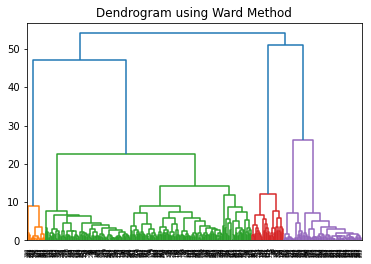

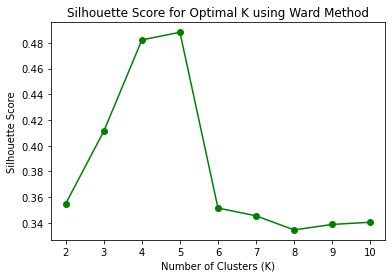

In [21]:
linkage_matrix = linkage(data, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram using Ward Method')
plt.show()

# 使用 fcluster 獲取分配到的集群標籤
labels = fcluster(linkage_matrix, t=5, criterion='maxclust')


silhouette_scores = []

for k in range(2, 11):  
    labels = fcluster(linkage_matrix, t=k, criterion='maxclust')
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)


plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score for Optimal K using Ward Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

結果:分5群最佳

使用Elbow method計算K-means最佳分群數

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score


In [26]:
data=pd.read_csv("../result/all_beta_normalized_train_0.35.csv")
data=data.iloc[:,1:]

In [41]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#使用 t-SNE 降維
tsne = TSNE(n_components=3)
reduced_data_tsne = tsne.fit_transform(data)


kmeans = KMeans(n_clusters=4)  
clusters = kmeans.fit_predict(reduced_data_tsne)


elev_init, azim_init = 20, 30


@interact(elev=(0, 90, 5), azim=(0, 360, 5))
def visualize_3d_scatter(elev, azim):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], reduced_data_tsne[:, 2], c=clusters, cmap='viridis')

    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_zlabel('t-SNE Component 3')
    ax.set_title('t-SNE 3D Visualization with KMeans Clustering')

    
    ax.view_init(elev=elev, azim=azim)
    
    plt.show()


interactive(children=(IntSlider(value=45, description='elev', max=90, step=5), IntSlider(value=180, descriptio…

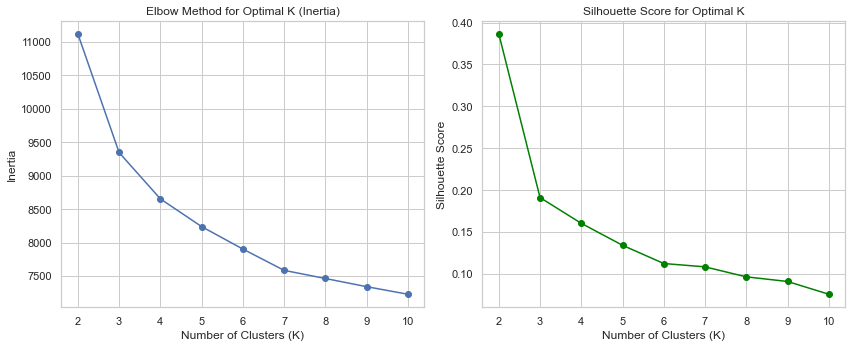

In [31]:
inertia = []
silhouette_scores = []

for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    
    inertia.append(kmeans.inertia_) # intertia 每個樣本到其分配的集群中心平方距離和，表示集群內的緊密度。
    

    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K (Inertia)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


此數據為非凸形狀的群集，因此不適合使用k-means分群。Silhouette score理想情況是在某個K值達到峰值，隨著K值的增加而下降。